# 01 — Data Cleaning

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [128]:
df = pd.read_csv('../data/raw/otodom.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (1000, 15)


,timestamp,title,price,market,surface,location,remote_support,lighting,advertiser_type,description,no_of_rooms,form_of_property,url,is_for_sale,posting_id
0,2024-10-05,2 pokoje|Komandorska|inwestycyjne|do negocjacji,549000,"[""market"",""secondary""]",41.8,"ul. Komandorska, Borek, Wrocław, dolnośląskie",NaN,NaN,agency,Wyłączny Opiekun Oferty: Magdalena Kowalczuk t...,2.0,NaN,https://www.otodom.pl/pl/oferta/2-pokoje-koman...,True,4r2w7
1,2026-01-07,"3-pokojowe mieszkanie, 64,5 m2, blisko Olsztyna",410000,"[""market"",""secondary""]",64,"Unieszewo, olsztyński, warmińsko-mazurskie",NaN,NaN,private,Na sprzedaż oferujemy mieszkanie o powierzchni...,3.0,spółdzielcze wł. prawo do lokalu,https://www.otodom.pl/pl/oferta/3-pokojowe-mie...,True,4yWta
2,2026-01-07,Piękne mieszkanie w Katowicach 1 najemca,2300,NaN,39,"ul. Mikołowska, Brynów, Katowice, śląskie",NaN,NaN,private,Witam.Zachęcam do wynajmu pięknego mieszkania ...,2.0,NaN,https://www.otodom.pl/pl/oferta/piekne-mieszka...,False,4zuRe
3,2023-09-04,3-pokojowe mieszkanie 63m2 + balkon Bezpośrednio,NaN,NaN,63.17,"ul. Grzegórzecka 77, Grzegórzki, Grzegórzki, K...",NaN,NaN,NaN,3-pokojowe mieszkanie numer F/099/M na parter...,3.0,pełna własność,https://otodom.pl/pl/oferta/3-pokojowe-mieszka...,True,4foGN
4,2024-01-17,1/2 domu w Nowym Lesie blisko Głuchołaz,129000,"[""market"",""secondary""]",92,"Nowy Las, Głuchołazy, nyski, opolskie",NaN,NaN,agency,Oferujemy Państwu do sprzedaży lokal mieszkaln...,4.0,pełna własność,https://www.otodom.pl/pl/oferta/1-2-domu-w-now...,True,4n44B


In [129]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         1000 non-null   str    
 1   title             943 non-null    str    
 2   price             899 non-null    str    
 3   market            561 non-null    str    
 4   surface           934 non-null    str    
 5   location          943 non-null    str    
 6   remote_support    155 non-null    str    
 7   lighting          6 non-null      str    
 8   advertiser_type   666 non-null    str    
 9   description       942 non-null    str    
 10  no_of_rooms       680 non-null    float64
 11  form_of_property  330 non-null    str    
 12  url               1000 non-null   str    
 13  is_for_sale       1000 non-null   bool   
 14  posting_id        938 non-null    str    
dtypes: bool(1), float64(1), str(13)
memory usage: 110.5 KB


In [130]:
df.describe()

,no_of_rooms
count,680.000000
mean,3.186765
std,1.574503
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


## Missing Values

In [131]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'count': missing, 'percent': missing_pct})
missing_df[missing_df['count'] > 0].sort_values('percent', ascending=False)

,count,percent
lighting,994,99.4
remote_support,845,84.5
form_of_property,670,67.0
market,439,43.9
advertiser_type,334,33.4
no_of_rooms,320,32.0
price,101,10.1
surface,66,6.6
posting_id,62,6.2
description,58,5.8


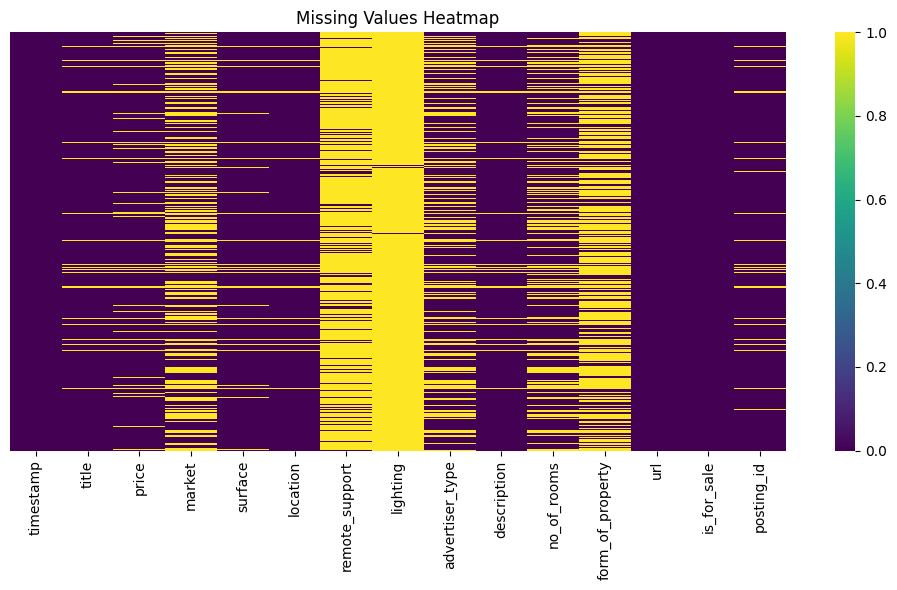

In [132]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## Duplicates

In [133]:
print(f'Duplicate rows: {df.duplicated().sum()}')
print(f'Duplicate posting_ids: {df["posting_id"].duplicated().sum()}')

Duplicate rows: 0
Duplicate posting_ids: 61


In [134]:
df = df.drop_duplicates(subset='posting_id', keep='first')
print(f'Shape after removing duplicates: {df.shape}')

Shape after removing duplicates: (939, 15)


## Column Types & Fixes

In [135]:
df.dtypes

timestamp               str
title                   str
price                   str
market                  str
surface                 str
location                str
remote_support          str
lighting                str
advertiser_type         str
description             str
no_of_rooms         float64
form_of_property        str
url                     str
is_for_sale            bool
posting_id              str
dtype: object

In [136]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['surface'] = pd.to_numeric(df['surface'], errors='coerce')
df['no_of_rooms'] = pd.to_numeric(df['no_of_rooms'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

## Remove Zero Prices

In [137]:
print(f'Rows with price = 0: {(df["price"] == 0).sum()}')
print(f'Rows with price < 1000: {(df["price"] < 1000).sum()}')
print(f'Rows with surface = 0: {(df["surface"] == 0).sum()}')
print(f'Rows with price NaN: {df["price"].isna().sum()}')
print(f'Rows with surface NaN: {df["surface"].isna().sum()}')

df = df[(df['price'] >= 100000) & (df['surface'] > 0)]
df = df.dropna(subset=['price', 'surface'])
print(f'Shape after removing invalid rows: {df.shape}')

Rows with price = 0: 0
Rows with price < 1000: 6
Rows with surface = 0: 0
Rows with price NaN: 45
Rows with surface NaN: 10
Shape after removing invalid rows: (696, 15)


## Price per m²

In [138]:
df['price_per_m2'] = df['price'] / df['surface']
df = df.dropna(subset=['price_per_m2'])
print(f'Shape after price_per_m2 cleanup: {df.shape}')
df[['price', 'surface', 'price_per_m2']].describe()

Shape after price_per_m2 cleanup: (696, 16)


,price,surface,price_per_m2
count,6.960000e+02,696.000000,696.000000
mean,8.432467e+05,835.593463,8032.317332
std,1.182506e+06,2853.961239,6442.625150
min,1.000000e+05,8.540000,5.227273
25%,3.572480e+05,52.750000,3599.098215
50%,6.037500e+05,80.650000,7500.232645
75%,9.125000e+05,231.500000,11188.157895
max,2.000000e+07,33948.000000,55544.444444


## Location Parsing

In [139]:
df['location'].head(10)

0         ul. Komandorska, Borek, Wrocław, dolnośląskie
1            Unieszewo, olsztyński, warmińsko-mazurskie
4                 Nowy Las, Głuchołazy, nyski, opolskie
5                Brzesko, Brzesko, brzeski, małopolskie
6             Zelków, Zabierzów, krakowski, małopolskie
7                 Żarów, Żarów, świdnicki, dolnośląskie
10            ul. Lubowidzka, Jasień, Gdańsk, pomorskie
11    ul. Spacerowa, Kąty Wrocławskie, Kąty Wrocławs...
12    ul. Tylna, Krosno, Mosina, poznański, wielkopo...
14               Strzyżowice, Psary, będziński, śląskie
Name: location, dtype: str

In [140]:
location_split = df['location'].str.split(', ', expand=True)
location_split.head(10)

,0,1,2,3,4
0,ul. Komandorska,Borek,Wrocław,dolnośląskie,NaN
1,Unieszewo,olsztyński,warmińsko-mazurskie,NaN,NaN
4,Nowy Las,Głuchołazy,nyski,opolskie,NaN
5,Brzesko,Brzesko,brzeski,małopolskie,NaN
6,Zelków,Zabierzów,krakowski,małopolskie,NaN
7,Żarów,Żarów,świdnicki,dolnośląskie,NaN
10,ul. Lubowidzka,Jasień,Gdańsk,pomorskie,NaN
11,ul. Spacerowa,Kąty Wrocławskie,Kąty Wrocławskie,wrocławski,dolnośląskie
12,ul. Tylna,Krosno,Mosina,poznański,wielkopolskie
14,Strzyżowice,Psary,będziński,śląskie,NaN


In [141]:
df['voivodeship'] = location_split.iloc[:, -1]
df['city'] = location_split.iloc[:, -2]
df[['location', 'city', 'voivodeship']].head(10)

,location,city,voivodeship
0,"ul. Komandorska, Borek, Wrocław, dolnośląskie",dolnośląskie,NaN
1,"Unieszewo, olsztyński, warmińsko-mazurskie",NaN,NaN
4,"Nowy Las, Głuchołazy, nyski, opolskie",opolskie,NaN
5,"Brzesko, Brzesko, brzeski, małopolskie",małopolskie,NaN
6,"Zelków, Zabierzów, krakowski, małopolskie",małopolskie,NaN
7,"Żarów, Żarów, świdnicki, dolnośląskie",dolnośląskie,NaN
10,"ul. Lubowidzka, Jasień, Gdańsk, pomorskie",pomorskie,NaN
11,"ul. Spacerowa, Kąty Wrocławskie, Kąty Wrocławs...",wrocławski,dolnośląskie
12,"ul. Tylna, Krosno, Mosina, poznański, wielkopo...",poznański,wielkopolskie
14,"Strzyżowice, Psary, będziński, śląskie",śląskie,NaN


## Outliers

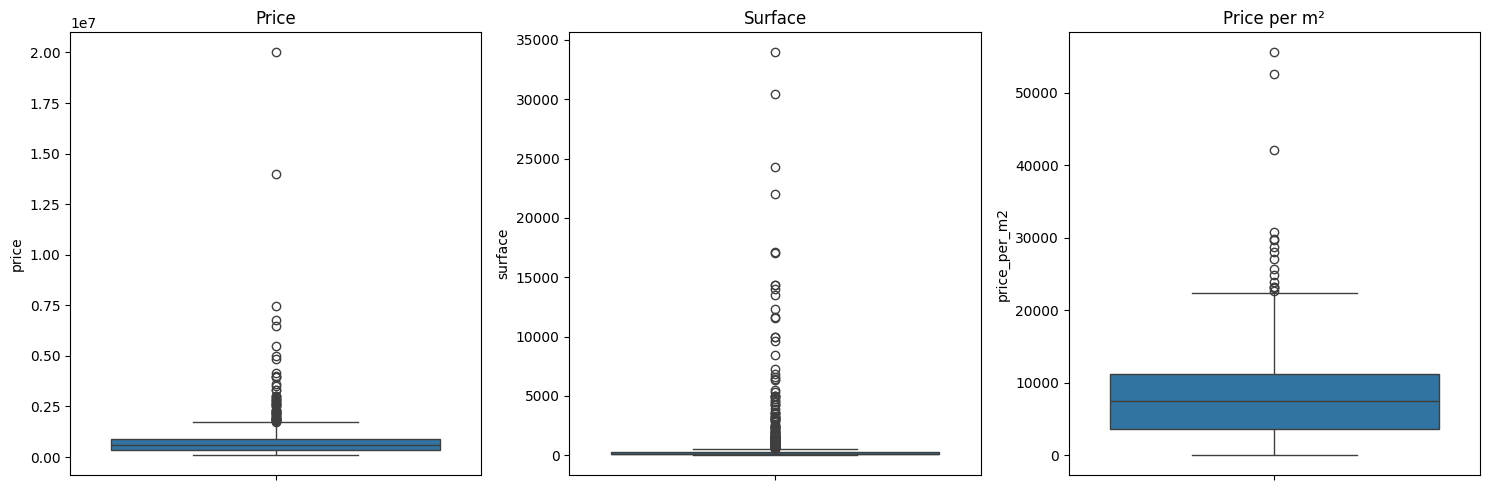

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['price'], ax=axes[0])
axes[0].set_title('Price')

sns.boxplot(y=df['surface'], ax=axes[1])
axes[1].set_title('Surface')

sns.boxplot(y=df['price_per_m2'], ax=axes[2])
axes[2].set_title('Price per m²')

plt.tight_layout()
plt.show()

In [143]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

In [144]:
print(f'Before: {len(df)}')
df_clean = remove_outliers_iqr(df, 'price')
df_clean = remove_outliers_iqr(df_clean, 'surface')
df_clean = remove_outliers_iqr(df_clean, 'price_per_m2')
print(f'After: {len(df_clean)}')

Before: 696
After: 502


## Drop Unnecessary Columns

In [145]:
cols_to_drop = ['url', 'posting_id', 'description', 'title', 'timestamp', 'remote_support', 'lighting']
df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')
df_clean.columns.tolist()

['price',
 'market',
 'surface',
 'location',
 'advertiser_type',
 'no_of_rooms',
 'form_of_property',
 'is_for_sale',
 'price_per_m2',
 'voivodeship',
 'city']

## Final Check

In [146]:
print(f'Final shape: {df_clean.shape}')
print(f'Missing values:\n{df_clean.isnull().sum()}')
df_clean.head()

Final shape: (502, 11)
Missing values:
price                 0
market               27
surface               0
location              0
advertiser_type      27
no_of_rooms          19
form_of_property    231
is_for_sale           0
price_per_m2          0
voivodeship         442
city                195
dtype: int64


,price,market,surface,location,advertiser_type,no_of_rooms,form_of_property,is_for_sale,price_per_m2,voivodeship,city
0,549000.0,"[""market"",""secondary""]",41.8,"ul. Komandorska, Borek, Wrocław, dolnośląskie",agency,2.0,NaN,True,13133.971292,NaN,dolnośląskie
1,410000.0,"[""market"",""secondary""]",64.0,"Unieszewo, olsztyński, warmińsko-mazurskie",private,3.0,spółdzielcze wł. prawo do lokalu,True,6406.250000,NaN,NaN
4,129000.0,"[""market"",""secondary""]",92.0,"Nowy Las, Głuchołazy, nyski, opolskie",agency,4.0,pełna własność,True,1402.173913,NaN,opolskie
5,820000.0,"[""market"",""secondary""]",106.0,"Brzesko, Brzesko, brzeski, małopolskie",private,4.0,NaN,True,7735.849057,NaN,małopolskie
6,1399000.0,"[""market"",""primary""]",189.4,"Zelków, Zabierzów, krakowski, małopolskie",agency,5.0,NaN,True,7386.483633,NaN,małopolskie


## Save Cleaned Data

In [147]:
df_clean.to_csv('../data/processed/otodom_cleaned.csv', index=False)
print('Saved to data/processed/otodom_cleaned.csv')

Saved to data/processed/otodom_cleaned.csv
